<a href="https://colab.research.google.com/github/gizemerpek/Detection-of-DoS-Attacks/blob/main/DosAttackHttp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import entropy

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import entropy


# Load the dataset
df = pd.read_csv("/content/DoS_Attack_HTTP_Dataset.csv")

# Display the first few rows of the copied dataset
print("First few rows of the copied dataset:")
df.head()


First few rows of the copied dataset:


,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.100.150-192.168.100.3-51370-80-6,192.168.100.150,51370,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5003748,3,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Anomaly,DoS,DoS_HTTP
1,192.168.100.150-192.168.100.3-51368-80-6,192.168.100.150,51368,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5004214,3,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Anomaly,DoS,DoS_HTTP
2,192.168.100.150-192.168.100.3-51372-80-6,192.168.100.150,51372,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5003495,3,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Anomaly,DoS,DoS_HTTP
3,192.168.100.150-192.168.100.3-51374-80-6,192.168.100.150,51374,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5003215,3,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Anomaly,DoS,DoS_HTTP
4,192.168.100.150-192.168.100.3-51376-80-6,192.168.100.150,51376,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5002975,3,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Anomaly,DoS,DoS_HTTP


In [ ]:
# Display the dimensions of the copied dataset
print("\nDimensions of the copied dataset:")
df.shape


Dimensions of the copied dataset:


(52466, 86)

In [ ]:
# Display basic statistics for numerical columns in the copied dataset
print("\nSummary statistics for numerical columns in the copied dataset:")
df.describe()


Summary statistics for numerical columns in the copied dataset:


,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
count,52466.000000,52466.000000,52466.000000,5.246600e+04,52466.000000,52466.000000,5.246600e+04,5.246600e+04,52466.000000,52466.000000,...,52466.000000,52466.0,5.246600e+04,5.246600e+04,5.246600e+04,5.246600e+04,5.246600e+04,5.246600e+04,5.246600e+04,5.246600e+04
mean,47050.529200,1501.611691,6.022071,2.151672e+07,26.762074,12.085103,1.884416e+04,8.628475e+03,245.663515,3.324038,...,25.153757,0.0,6.333993e+04,1.835744e+04,8.336379e+04,5.044620e+04,1.626185e+07,3.460345e+04,1.629925e+07,1.623582e+07
std,11848.992772,8462.286010,0.502020,2.147455e+07,441.616419,286.512092,3.796717e+05,2.639271e+05,240.916769,53.548732,...,441.703860,0.0,8.472763e+05,3.557754e+05,1.049507e+06,7.944014e+05,2.150785e+07,5.042377e+05,2.151519e+07,2.151443e+07
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,38974.000000,80.000000,6.000000,7.260614e+06,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,51386.000000,80.000000,6.000000,1.382454e+07,3.000000,4.000000,3.295000e+02,4.940000e+02,327.000000,0.000000,...,1.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.967406e+06,0.000000e+00,6.967411e+06,6.966082e+06
75%,55058.000000,80.000000,6.000000,3.206856e+07,3.000000,5.000000,4.420000e+02,4.940000e+02,436.000000,0.000000,...,1.000000,0.0,8.500000e+01,0.000000e+00,8.600000e+01,8.500000e+01,2.022986e+07,0.000000e+00,2.024176e+07,2.022985e+07
max,64018.000000,60938.000000,17.000000,1.200000e+08,9599.000000,9599.000000,9.152846e+06,9.151233e+06,1472.000000,1138.000000,...,9599.000000,0.0,1.000445e+08,1.182355e+07,1.000445e+08,1.000445e+08,1.193674e+08,2.060854e+07,1.193674e+08,1.193674e+08


In [ ]:
print('\nInformation about the dataset')
df.info()


Information about the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52466 entries, 0 to 52465
Data columns (total 86 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flow_ID            52466 non-null  object 
 1   Src_IP             52466 non-null  object 
 2   Src_Port           52466 non-null  int64  
 3   Dst_IP             52466 non-null  object 
 4   Dst_Port           52466 non-null  int64  
 5   Protocol           52466 non-null  int64  
 6   Timestamp          52466 non-null  object 
 7   Flow_Duration      52466 non-null  int64  
 8   Tot_Fwd_Pkts       52466 non-null  int64  
 9   Tot_Bwd_Pkts       52466 non-null  int64  
 10  TotLen_Fwd_Pkts    52466 non-null  float64
 11  TotLen_Bwd_Pkts    52466 non-null  float64
 12  Fwd_Pkt_Len_Max    52466 non-null  float64
 13  Fwd_Pkt_Len_Min    52466 non-null  float64
 14  Fwd_Pkt_Len_Mean   52466 non-null  float64
 15  Fwd_Pkt_Len_Std    52466 non-null  floa

In [ ]:
print('\n Checking for null values.....')
null_values = df.isnull().sum()


 Checking for null values.....


In [ ]:
print('Display columns with null values')
null_columns = null_values[null_values > 0]
if not null_columns.empty:
    print('Columns with null values:')
    print(null_columns)
else:
    print('No null values found in the dataset.')

Display columns with null values
Columns with null values:
Flow_Byts/s    3
dtype: int64


In [ ]:
#Impute null values with the mean of the column
mean_flow_bytes_per_second = df['Flow_Byts/s'].mean()
df['Flow_Byts/s'].fillna(mean_flow_bytes_per_second)

,Flow_Byts/s
0,160.479704
1,176.651118
2,160.887540
3,180.683820
4,178.493796
...,...
52461,31529.640358
52462,148918.965671
52463,70567.586355
52464,6535.064331


In [ ]:
# Check for null values in the "Flow_Byts/s" column
null_values_flow_bytes_per_second = df['Flow_Byts/s'].isnull().sum()
print("Null values in 'Flow_Byts/s' column after replacement:", null_values_flow_bytes_per_second)

Null values in 'Flow_Byts/s' column after replacement: 3


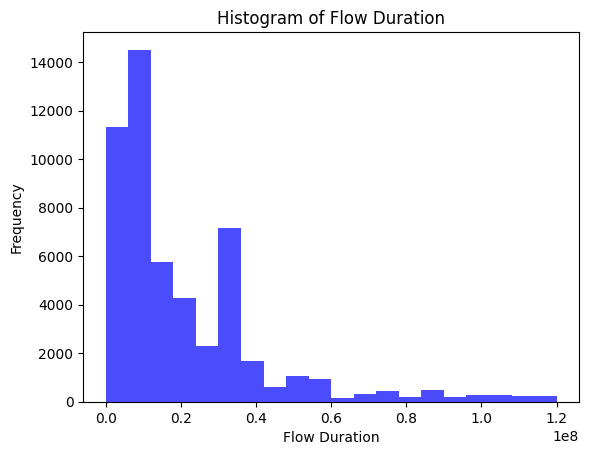

In [ ]:
import matplotlib.pyplot as plt

# Histogram of a numerical feature
plt.hist(df['Flow_Duration'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Flow Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Flow Duration')
plt.show()

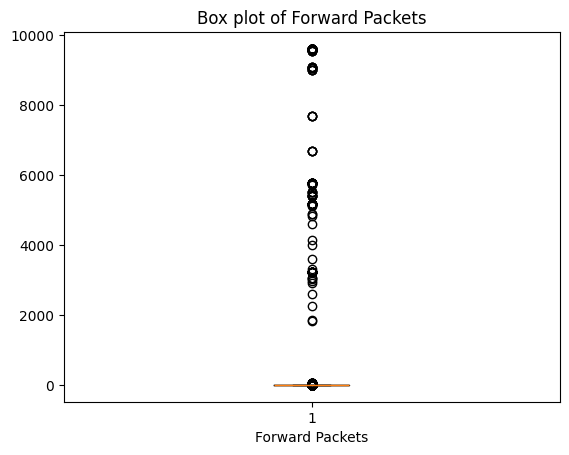

In [ ]:
# Box plot of a numerical feature
plt.boxplot(df['Tot_Fwd_Pkts'])
plt.xlabel('Forward Packets')
plt.title('Box plot of Forward Packets')
plt.show()

In [ ]:
# Summary statistics of a numerical feature
print("Summary statistics of Flow Duration:")
print(df['Flow_Duration'].describe())

Summary statistics of Flow Duration:
count    5.246600e+04
mean     2.151672e+07
std      2.147455e+07
min      0.000000e+00
25%      7.260614e+06
50%      1.382454e+07
75%      3.206856e+07
max      1.200000e+08
Name: Flow_Duration, dtype: float64


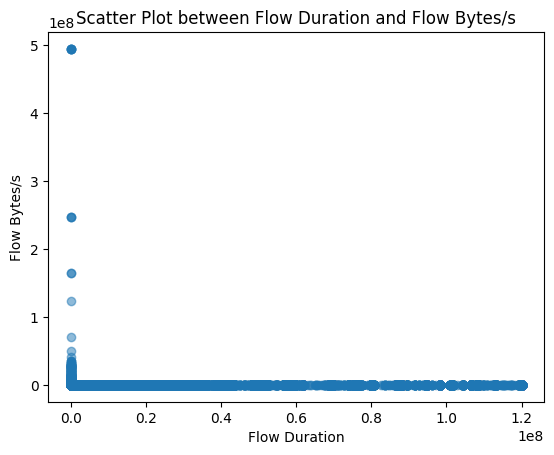

In [ ]:
# Scatter plot between two numerical features
plt.scatter(df['Flow_Duration'], df['Flow_Byts/s'], alpha=0.5)
plt.xlabel('Flow Duration')
plt.ylabel('Flow Bytes/s')
plt.title('Scatter Plot between Flow Duration and Flow Bytes/s')
plt.show()

In [ ]:
# Count the number of each unique value in the "Label" column
label_counts = df['Label'].value_counts()

# Assuming 'normal' and 'anomaly' are the actual labels in your "Label" column
print("Number of normal instances:", label_counts['Normal'])
print("Number of anomaly instances:", label_counts['Anomaly'])

Number of normal instances: 1700
Number of anomaly instances: 50766


             PC1        PC2    Label
0       0.648542  -0.562166  Anomaly
1       0.950666  -0.589320  Anomaly
2       0.655871  -0.562791  Anomaly
3       1.026433  -0.596544  Anomaly
4       0.984640  -0.592548  Anomaly
...          ...        ...      ...
52461  15.426541  20.841401   Normal
52462  36.062478  67.262054   Normal
52463  24.540249  40.556156   Normal
52464   6.199624  14.669763   Normal
52465   8.863336   1.569796   Normal

[52466 rows x 3 columns]


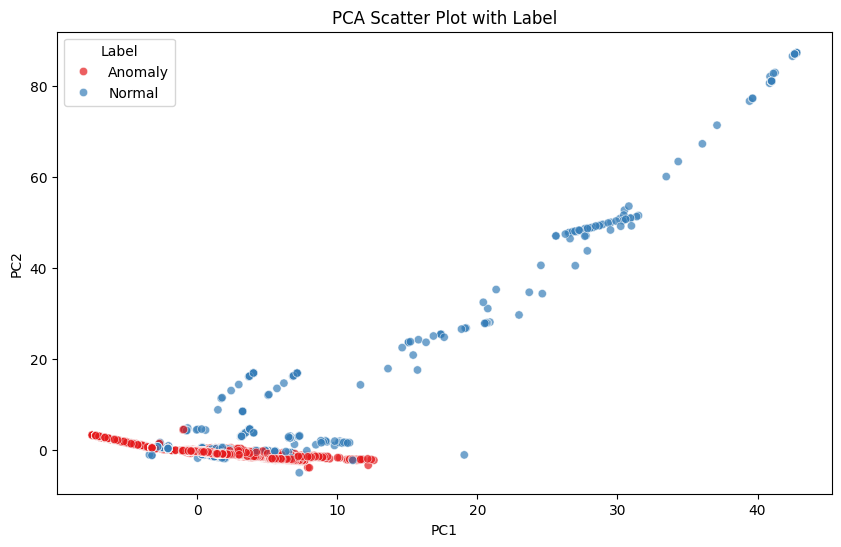

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Replace infinity values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Select only numerical columns for standardization
numerical_columns = df.select_dtypes(include=['number'])

# Impute NaN values with the mean of each column
numerical_columns_filled = numerical_columns.fillna(numerical_columns.mean())

# Standardize the numerical data
scaler = StandardScaler()
numerical_columns_scaled = scaler.fit_transform(numerical_columns_filled)

# Perform PCA on the scaled data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numerical_columns_scaled)

# Create DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Concatenate PCA results with labels
pca_df['Label'] = df['Label']
print(pca_df)

# Plot PCA results with labels
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Label', palette='Set1', alpha=0.7)
plt.title('PCA Scatter Plot with Label')
plt.show()

In [ ]:
pca_df.head(10)

,PC1,PC2,Label
0,0.648542,-0.562166,Anomaly
1,0.950666,-0.589320,Anomaly
2,0.655871,-0.562791,Anomaly
3,1.026433,-0.596544,Anomaly
4,0.984640,-0.592548,Anomaly
5,1.967107,-0.712593,Anomaly
6,1.500317,-0.648882,Anomaly
7,0.935624,-0.588026,Anomaly
8,0.498979,-0.549912,Anomaly
9,1.202719,-0.614011,Anomaly


In [ ]:
#Feature selection
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in ['Label', 'Cat', 'Sub_Cat']:
    df[col + '_Encoded'] = label_encoder.fit_transform(df[col])

# Flip the labels
for col in ['Label_Encoded', 'Cat_Encoded', 'Sub_Cat_Encoded']:
    df[col] = 1 - df[col]

# Drop original categorical columns after encoding
df.drop(['Label', 'Cat', 'Sub_Cat'], axis=1, inplace=True)

from sklearn.preprocessing import LabelEncoder

# Exclude non-numeric columns from the correlation calculation
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_with_label = df[numeric_columns].corrwith(df['Label_Encoded']).drop('Label_Encoded')

# Sort the correlations in descending order
correlation_with_label_sorted = correlation_with_label.abs().sort_values(ascending=False)

# Display the sorted correlation values
correlation_with_label_sorted.head(20)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,0
Sub_Cat_Encoded,1.000000
Cat_Encoded,1.000000
Dst_Port,0.918033
Src_Port,0.706063
PSH_Flag_Cnt,0.673029
Bwd_PSH_Flags,0.673029
FIN_Flag_Cnt,0.521628
Pkt_Size_Avg,0.433530
Pkt_Len_Mean,0.386511
Flow_IAT_Std,0.365963


In [ ]:
df.head()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label_Encoded,Cat_Encoded,Sub_Cat_Encoded
0,192.168.100.150-192.168.100.3-51370-80-6,192.168.100.150,51370,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5003748,3,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1
1,192.168.100.150-192.168.100.3-51368-80-6,192.168.100.150,51368,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5004214,3,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1
2,192.168.100.150-192.168.100.3-51372-80-6,192.168.100.150,51372,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5003495,3,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1
3,192.168.100.150-192.168.100.3-51374-80-6,192.168.100.150,51374,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5003215,3,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1
4,192.168.100.150-192.168.100.3-51376-80-6,192.168.100.150,51376,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5002975,3,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1


In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_columns)

from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif


# Selecting the numerical features
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
X_numerical = df[numerical_cols]
X_numerical = X_numerical.drop('Label_Encoded', axis=1)

# Impute missing values in numerical columns with the mean
imputer = SimpleImputer(strategy='mean')
X_numerical_imputed = imputer.fit_transform(X_numerical)

# Calculate mutual information for numerical features after imputation
mutual_info_numerical = mutual_info_classif(X_numerical_imputed, df['Label_Encoded'], discrete_features='auto')

# Create a DataFrame to display the results
mutual_info_numerical_df = pd.DataFrame(mutual_info_numerical, index=X_numerical.columns, columns=['Mutual Information'])
mutual_info_numerical_df.sort_values(by='Mutual Information', ascending=False, inplace=True)
mutual_info_numerical_df.head(10)

Categorical Columns: ['Flow_ID', 'Src_IP', 'Dst_IP', 'Timestamp']


,Mutual Information
Sub_Cat_Encoded,0.154717
Cat_Encoded,0.154110
Src_Port,0.140008
Dst_Port,0.128121
Flow_Pkts/s,0.123157
Bwd_Pkts/s,0.122921
Fwd_Pkts/s,0.121887
Flow_IAT_Mean,0.119834
Bwd_Header_Len,0.117590
Flow_IAT_Std,0.113265


In [ ]:
#Feature Engineering

# Create new feature: Packet rate (packets per second)
df['Packet_Rate'] = df['Tot_Fwd_Pkts'] / df['Flow_Duration']

# Create new feature: Packet size distribution (ratio of forward packets to total packets)
df['Packet_Size_Distribution'] = df['Tot_Fwd_Pkts'] / (df['Tot_Fwd_Pkts'] + df['Tot_Bwd_Pkts'])

# Create new feature: Frequency of specific protocol types
# Assuming Protocol column contains protocol types
protocol_counts = df['Protocol'].value_counts(normalize=True)  # Get relative frequency of each protocol
df['Protocol_Frequency'] = df['Protocol'].map(protocol_counts)

# Display the updated DataFrame with new features
df.head()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label_Encoded,Cat_Encoded,Sub_Cat_Encoded,Packet_Rate,Packet_Size_Distribution,Protocol_Frequency
0,192.168.100.150-192.168.100.3-51370-80-6,192.168.100.150,51370,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5003748,3,5,...,0.0,0.0,0.0,0.0,1,1,1,5.995506e-07,0.375,0.997846
1,192.168.100.150-192.168.100.3-51368-80-6,192.168.100.150,51368,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5004214,3,5,...,0.0,0.0,0.0,0.0,1,1,1,5.994947e-07,0.375,0.997846
2,192.168.100.150-192.168.100.3-51372-80-6,192.168.100.150,51372,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5003495,3,5,...,0.0,0.0,0.0,0.0,1,1,1,5.995809e-07,0.375,0.997846
3,192.168.100.150-192.168.100.3-51374-80-6,192.168.100.150,51374,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5003215,3,5,...,0.0,0.0,0.0,0.0,1,1,1,5.996144e-07,0.375,0.997846
4,192.168.100.150-192.168.100.3-51376-80-6,192.168.100.150,51376,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5002975,3,5,...,0.0,0.0,0.0,0.0,1,1,1,5.996432e-07,0.375,0.997846


In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values in numerical columns with the mean
imputer = SimpleImputer(strategy='mean')
X_numerical_imputed = imputer.fit_transform(X_numerical)

# Calculate mutual information for numerical features after imputation
mutual_info_numerical = mutual_info_classif(X_numerical_imputed, df['Label_Encoded'], discrete_features='auto')

# Create a DataFrame to display the results
mutual_info_numerical_df = pd.DataFrame(mutual_info_numerical, index=X_numerical.columns, columns=['Mutual Information'])
mutual_info_numerical_df.sort_values(by='Mutual Information', ascending=False, inplace=True)
mutual_info_numerical_df.head(20)

,Mutual Information
Sub_Cat_Encoded,0.154269
Cat_Encoded,0.154221
Src_Port,0.140017
Dst_Port,0.127853
Flow_Pkts/s,0.123225
Bwd_Pkts/s,0.122848
Fwd_Pkts/s,0.121711
Flow_IAT_Mean,0.119891
Bwd_Header_Len,0.116606
Flow_IAT_Std,0.113677


In [ ]:
# List of features related to network traffic patterns, packet characteristics, and communication behavior
relevant_features = [
    'Flow_Duration', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts',
    'Fwd_Pkt_Len_Max', 'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std',
    'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean', 'Bwd_Pkt_Len_Std',
    'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
    'Fwd_IAT_Tot', 'Fwd_IAT_Mean', 'Bwd_IAT_Mean', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
    'Bwd_IAT_Tot', 'Fwd_IAT_Std', 'Bwd_IAT_Std', 'Bwd_IAT_Max', 'Bwd_IAT_Min',
    'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags', 'Bwd_URG_Flags',
    'Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts/s', 'Bwd_Pkts/s',
    'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean', 'Pkt_Len_Std', 'Pkt_Len_Var',
    'FIN_Flag_Cnt', 'SYN_Flag_Cnt', 'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK_Flag_Cnt',
    'URG_Flag_Cnt', 'CWE_Flag_Count', 'ECE_Flag_Cnt', 'Down/Up_Ratio',
    'Pkt_Size_Avg', 'Fwd_Seg_Size_Avg', 'Bwd_Seg_Size_Avg', 'Fwd_Byts/b_Avg',
    'Fwd_Pkts/b_Avg', 'Fwd_Blk_Rate_Avg', 'Bwd_Byts/b_Avg', 'Bwd_Pkts/b_Avg',
    'Bwd_Blk_Rate_Avg', 'Subflow_Fwd_Pkts', 'Subflow_Fwd_Byts', 'Subflow_Bwd_Pkts',
    'Subflow_Bwd_Byts', 'Init_Fwd_Win_Byts', 'Init_Bwd_Win_Byts', 'Fwd_Act_Data_Pkts',
    'Fwd_Seg_Size_Min', 'Active_Mean', 'Active_Std', 'Active_Max', 'Active_Min',
    'Idle_Mean', 'Idle_Std', 'Idle_Max', 'Idle_Min',
    'Packet_Rate', 'Packet_Size_Distribution', 'Protocol_Frequency'
]

# Remove irrelevant or redundant features
df_selected_features = df[relevant_features]

# Display the selected features
print("Updated Selected Features:")
df_selected_features.columns

Updated Selected Features:


Index(['Flow_Duration', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts',
       'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max', 'Fwd_Pkt_Len_Min',
       'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std', 'Bwd_Pkt_Len_Max',
       'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean', 'Bwd_Pkt_Len_Std', 'Flow_Byts/s',
       'Flow_Pkts/s', 'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max',
       'Flow_IAT_Min', 'Fwd_IAT_Tot', 'Fwd_IAT_Mean', 'Bwd_IAT_Mean',
       'Fwd_IAT_Max', 'Fwd_IAT_Min', 'Bwd_IAT_Tot', 'Fwd_IAT_Std',
       'Bwd_IAT_Std', 'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags',
       'Bwd_PSH_Flags', 'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Len',
       'Bwd_Header_Len', 'Fwd_Pkts/s', 'Bwd_Pkts/s', 'Pkt_Len_Min',
       'Pkt_Len_Max', 'Pkt_Len_Mean', 'Pkt_Len_Std', 'Pkt_Len_Var',
       'FIN_Flag_Cnt', 'SYN_Flag_Cnt', 'RST_Flag_Cnt', 'PSH_Flag_Cnt',
       'ACK_Flag_Cnt', 'URG_Flag_Cnt', 'CWE_Flag_Count', 'ECE_Flag_Cnt',
       'Down/Up_Ratio', 'Pkt_Size_Avg', 'Fwd_Seg_Size_Avg', 'Bwd_Seg_Size_Avg',
   

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select only numerical features for scaling
numerical_features = df_selected_features.select_dtypes(include=['float64', 'int64'])

# Clip extreme values to a specified range
lower_bound = -1e6  # Specify the lower bound
upper_bound = 1e6   # Specify the upper bound
numerical_features = numerical_features.clip(lower=lower_bound, upper=upper_bound)

# Standardize numerical features since we are using bi-LSTM
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)
df_scaled = pd.DataFrame(scaled_features, columns=numerical_features.columns)

# Concatenate scaled numerical features with categorical features
df_concatenated = pd.concat([df_scaled, df[['Cat_Encoded', 'Sub_Cat_Encoded']]], axis=1)

# Display the concatenated dataset
print("Concatenated Dataset:")
print(df_concatenated.head())

# Split the concatenated dataset into features (X) and target (y)
X = df_concatenated
y = df['Label_Encoded']

# Further split the dataset into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train['Flow_Pkts/s'] = X_train['Flow_Pkts/s'].fillna(0)



# Display the shapes of the training and validation sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

Concatenated Dataset:
   Flow_Duration  Tot_Fwd_Pkts  Tot_Bwd_Pkts  TotLen_Fwd_Pkts  \
0       0.187212     -0.053808     -0.024729        -0.054915   
1       0.187212     -0.053808     -0.024729        -0.053369   
2       0.187212     -0.053808     -0.024729        -0.054877   
3       0.187212     -0.053808     -0.024729        -0.052988   
4       0.187212     -0.053808     -0.024729        -0.053198   

   TotLen_Bwd_Pkts  Fwd_Pkt_Len_Max  Fwd_Pkt_Len_Min  Fwd_Pkt_Len_Mean  \
0        -0.028323         0.262900        -0.062076          0.166558   
1        -0.028323         0.599119        -0.062076          0.429816   
2        -0.028323         0.271202        -0.062076          0.173058   
3        -0.028323         0.682136        -0.062076          0.494818   
4        -0.028323         0.636477        -0.062076          0.459067   

   Fwd_Pkt_Len_Std  Bwd_Pkt_Len_Max  ...  Active_Min  Idle_Mean  Idle_Std  \
0         0.314315         0.231888  ...   -0.107812  -1.509134 -

In [ ]:
# Check for null values in X_train by column
null_columns = X_train.columns[X_train.isnull().any()]
print("Columns with null values in X_train:")
print(null_columns)
X_train['Flow_Pkts/s'] = X_train['Flow_Pkts/s'].fillna(0)
# Check for null values in X_train by column
null_columns = X_train.columns[X_train.isnull().any()]
print("Columns with null values in X_train:")
print(null_columns)
X_train['Flow_Byts/s'] = X_train['Flow_Byts/s'].fillna(0)
null_columns = X_train.columns[X_train.isnull().any()]
print("Columns with null values in X_train after filling NaN:")
print(null_columns)

Columns with null values in X_train:
Index(['Flow_Byts/s'], dtype='object')
Columns with null values in X_train:
Index(['Flow_Byts/s'], dtype='object')
Columns with null values in X_train after filling NaN:
Index([], dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/pyth

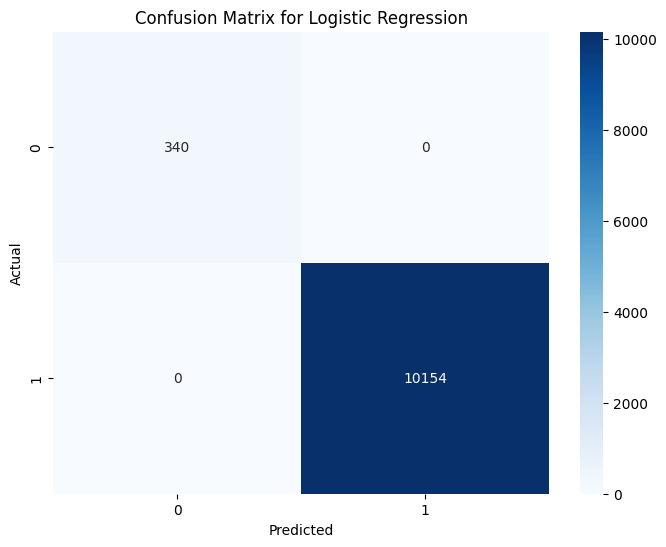

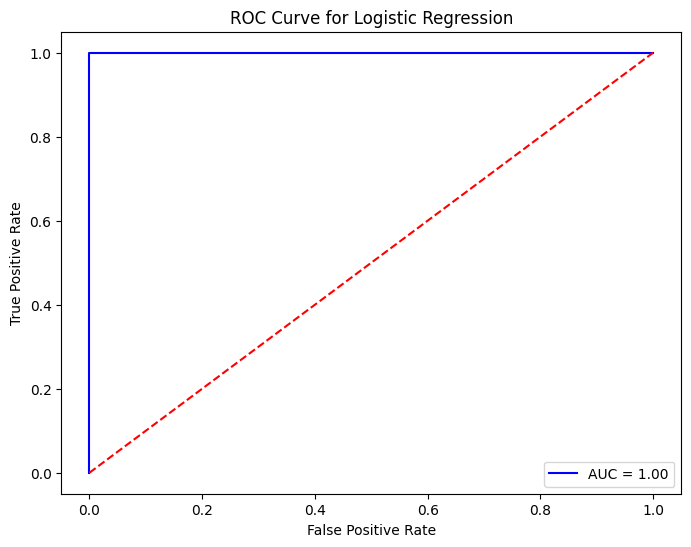


Logistic Regression Performance:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       340
           1       1.00      1.00      1.00     10154

    accuracy                           1.00     10494
   macro avg       1.00      1.00      1.00     10494
weighted avg       1.00      1.00      1.00     10494

AUC-ROC (CV): 1.0
AUC-ROC (Test): 1.0
F1 Score (CV): 1.0
Accuracy (CV): 1.0
Precision (CV): 1.0
Recall (CV): 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validatio

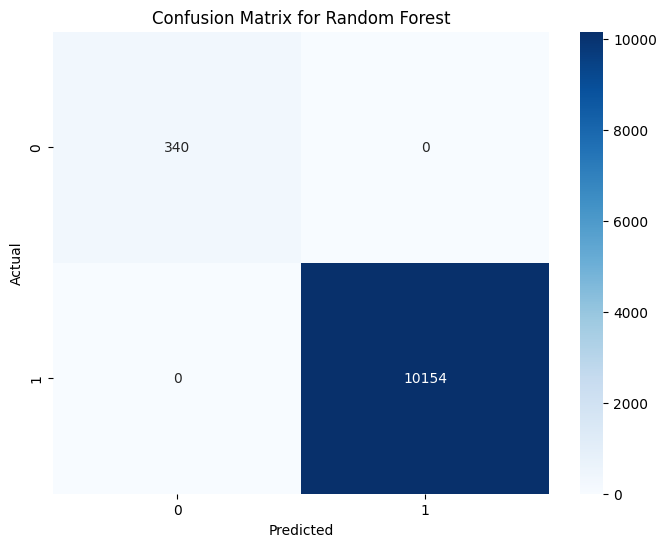

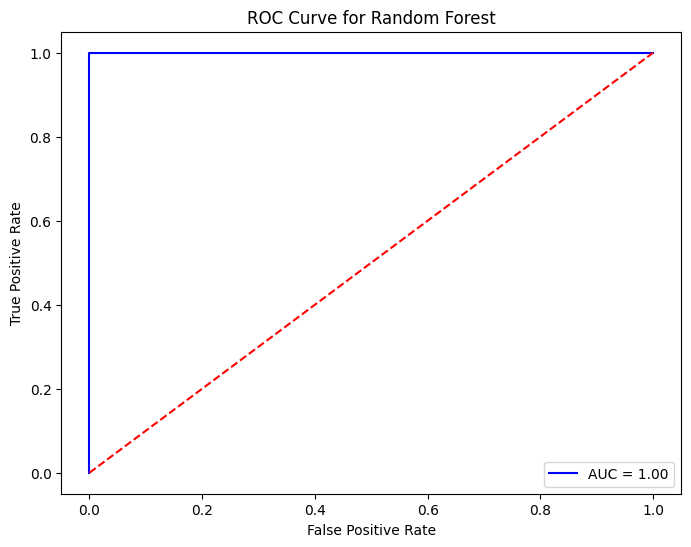


Random Forest Performance:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       340
           1       1.00      1.00      1.00     10154

    accuracy                           1.00     10494
   macro avg       1.00      1.00      1.00     10494
weighted avg       1.00      1.00      1.00     10494

AUC-ROC (CV): 1.0
AUC-ROC (Test): 1.0
F1 Score (CV): 1.0
Accuracy (CV): 1.0
Precision (CV): 1.0
Recall (CV): 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validatio

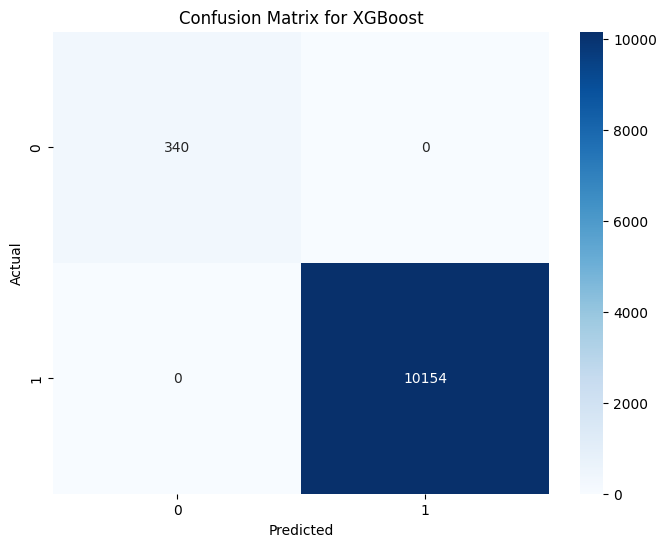

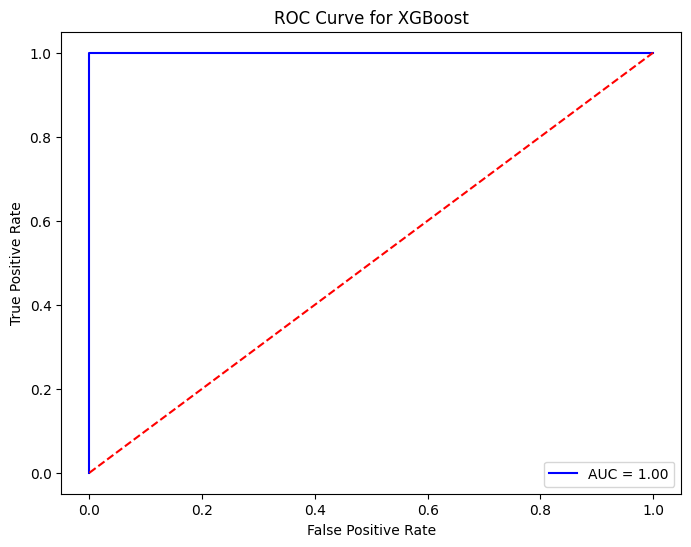


XGBoost Performance:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       340
           1       1.00      1.00      1.00     10154

    accuracy                           1.00     10494
   macro avg       1.00      1.00      1.00     10494
weighted avg       1.00      1.00      1.00     10494

AUC-ROC (CV): 1.0
AUC-ROC (Test): 1.0
F1 Score (CV): 1.0
Accuracy (CV): 1.0
Precision (CV): 1.0
Recall (CV): 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warn

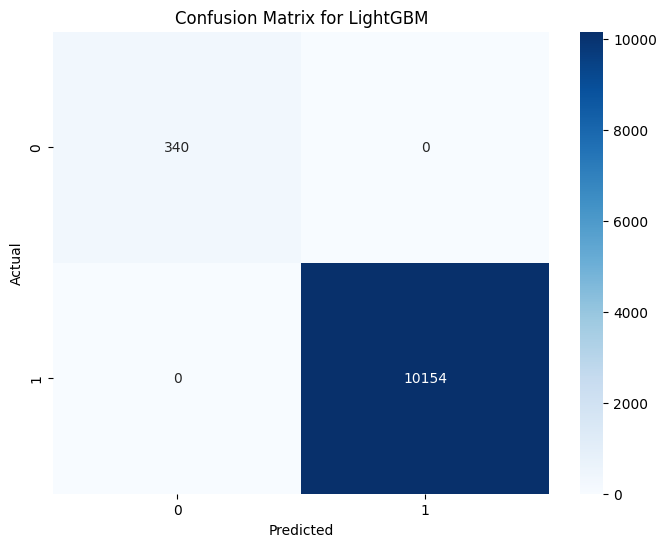

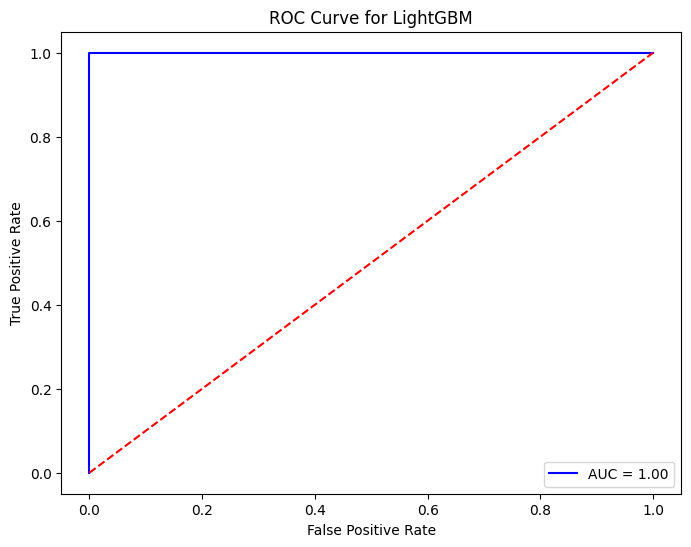


LightGBM Performance:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       340
           1       1.00      1.00      1.00     10154

    accuracy                           1.00     10494
   macro avg       1.00      1.00      1.00     10494
weighted avg       1.00      1.00      1.00     10494

AUC-ROC (CV): 1.0
AUC-ROC (Test): 1.0
F1 Score (CV): 1.0
Accuracy (CV): 1.0
Precision (CV): 1.0
Recall (CV): 1.0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Gaussian Noise Addition
def add_gaussian_noise(data, mean=0, std=0.01):
    noise = np.random.normal(mean, std, data.shape)
    return data + noise

# Data Preprocessing Function
def preprocess_data(X, y):
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)

    selector = SelectKBest(score_func=f_classif, k=5)
    X_selected = selector.fit_transform(X_imputed, y)

    return X_selected, y

# Data Preprocessing
X, y = preprocess_data(X, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Gaussian Noise Addition
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_noisy = add_gaussian_noise(X_train_scaled)

# SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_noisy, y_train)

# Cross-validation settings
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model Evaluation Function
def evaluate_model(model, model_name):
    auc_scores = []
    f1_scores = []
    accuracy_scores = []
    precision_scores = []
    recall_scores = []

    for train_idx, val_idx in cv.split(X_train_scaled, y_train):
        X_train_cv, X_val_cv = X_train_scaled[train_idx], X_train_scaled[val_idx]
        y_train_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]

        X_train_cv_balanced, y_train_cv_balanced = smote.fit_resample(X_train_cv, y_train_cv)

        model.fit(X_train_cv_balanced, y_train_cv_balanced)

        y_pred_cv = model.predict(X_val_cv)
        y_prob_cv = model.predict_proba(X_val_cv)[:, 1]

        auc_scores.append(roc_auc_score(y_val_cv, y_prob_cv))
        f1_scores.append(f1_score(y_val_cv, y_pred_cv, average='weighted'))
        accuracy_scores.append(accuracy_score(y_val_cv, y_pred_cv))
        precision_scores.append(precision_score(y_val_cv, y_pred_cv, average='weighted'))
        recall_scores.append(recall_score(y_val_cv, y_pred_cv, average='weighted'))

    model.fit(X_train_balanced, y_train_balanced)

    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.title(f'ROC Curve for {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

    print(f"\n{model_name} Performance:")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("AUC-ROC (CV):", np.mean(auc_scores))
    print("AUC-ROC (Test):", roc_auc_score(y_test, y_prob))
    print("F1 Score (CV):", np.mean(f1_scores))
    print("Accuracy (CV):", np.mean(accuracy_scores))
    print("Precision (CV):", np.mean(precision_scores))
    print("Recall (CV):", np.mean(recall_scores))

# Logistic Regression
log_reg = LogisticRegression(
    C=0.1, penalty='l2', random_state=42, max_iter=1000, class_weight='balanced'
)
evaluate_model(log_reg, "Logistic Regression")

# Random Forest
random_forest = RandomForestClassifier(
    max_depth=5, min_samples_split=15, min_samples_leaf=7, random_state=42, class_weight='balanced'
)
evaluate_model(random_forest, "Random Forest")

# XGBoost
xgb = XGBClassifier(
    max_depth=5,
    learning_rate=0.05,
    n_estimators=200,
    random_state=42,
    reg_alpha=1.0,
    reg_lambda=1.0,
    scale_pos_weight=(len(y_train) / sum(y_train)),
    eval_metric="logloss",
    subsample=0.8,
    colsample_bytree=0.8,
)
evaluate_model(xgb, "XGBoost")

# LightGBM
lgbm = LGBMClassifier(
    num_leaves=30, max_depth=5, reg_alpha=1.0, reg_lambda=1.0, learning_rate=0.001,
    n_estimators=100, random_state=42, scale_pos_weight=(len(y_train) / sum(y_train)), verbose=-1,
    bagging_fraction=0.8,
    feature_fraction=0.8,
    bagging_freq=5
)
evaluate_model(lgbm, "LightGBM")

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/pyth

Epoch 1/5
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9970 - loss: 0.0138 - val_accuracy: 1.0000 - val_loss: 1.0676e-05
Epoch 2/5
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 1.0000 - loss: 9.3765e-05 - val_accuracy: 1.0000 - val_loss: 3.4571e-06
Epoch 3/5
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 1.0000 - loss: 3.5297e-05 - val_accuracy: 1.0000 - val_loss: 1.5497e-06
Epoch 4/5
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 1.0000 - loss: 1.6608e-05 - val_accuracy: 1.0000 - val_loss: 7.1526e-07
Epoch 5/5
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 1.0000 - loss: 9.4545e-06 - val_accuracy: 1.0000 - val_loss: 3.5763e-07


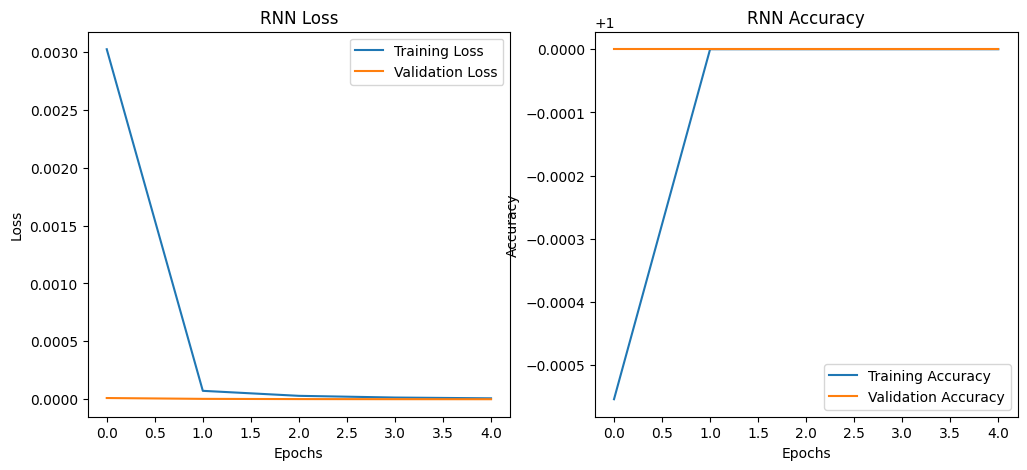

328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


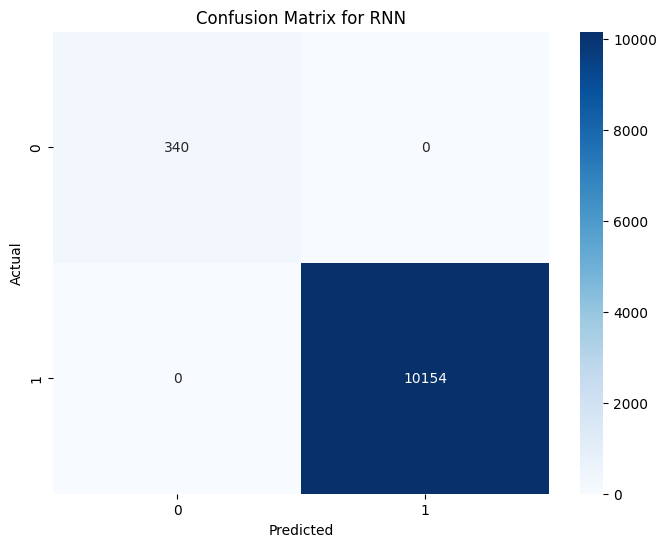

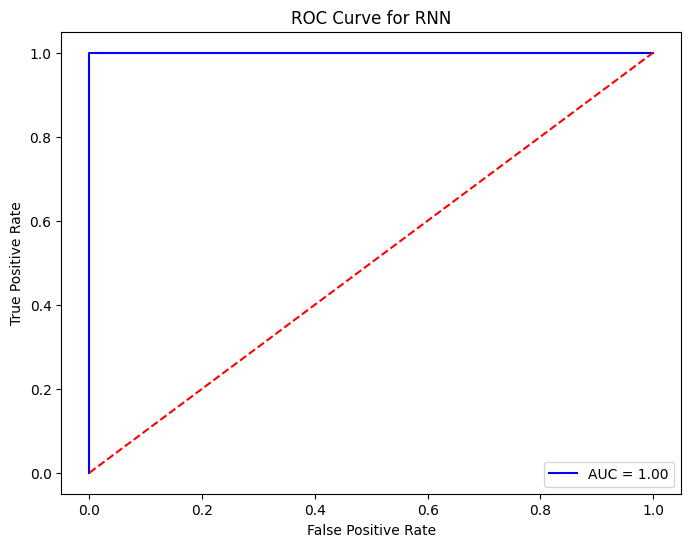


RNN Performance:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       340
           1       1.00      1.00      1.00     10154

    accuracy                           1.00     10494
   macro avg       1.00      1.00      1.00     10494
weighted avg       1.00      1.00      1.00     10494

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1016/1016 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9910 - loss: 0.0387 - val_accuracy: 1.0000 - val_loss: 1.3212e-04
Epoch 2/5
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9998 - loss: 4.6632e-04 - val_accuracy: 1.0000 - val_loss: 2.8625e-05
Epoch 3/5
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 1.0000 - loss: 1.4933e-04 - val_accuracy: 1.0000 - val_loss: 9.9409e-06
Epoch 4/5
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 1.0000 - loss: 7.3113e-05 - val_accuracy: 1.0000 - val_loss: 4.1327e-06
Epoch 5/5
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 1.0000 - loss: 2.9445e-05 - val_accuracy: 1.0000 - val_loss: 1.8167e-06


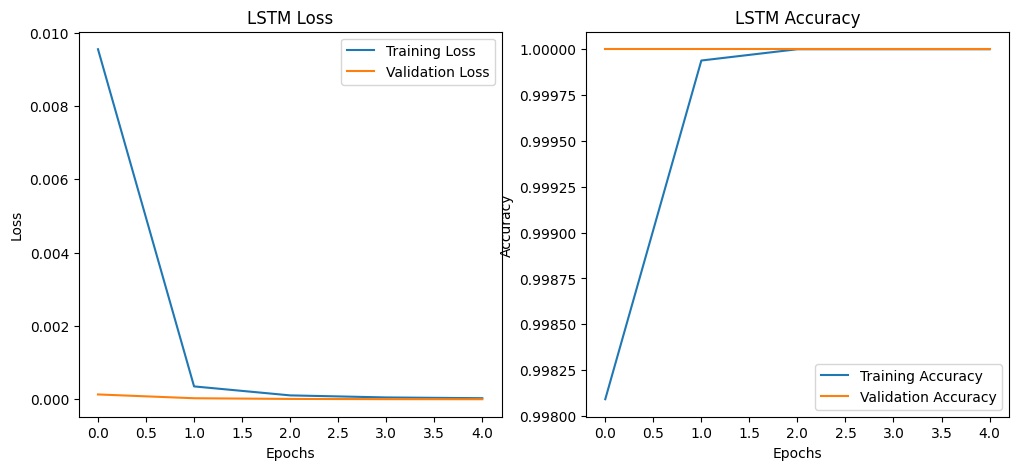

328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


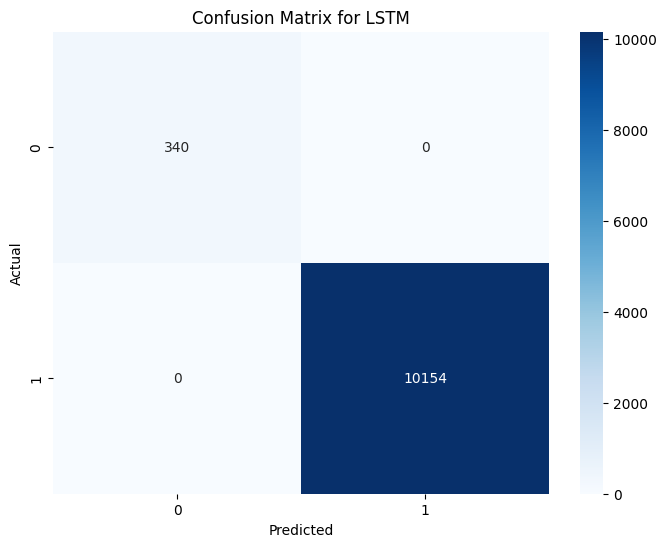

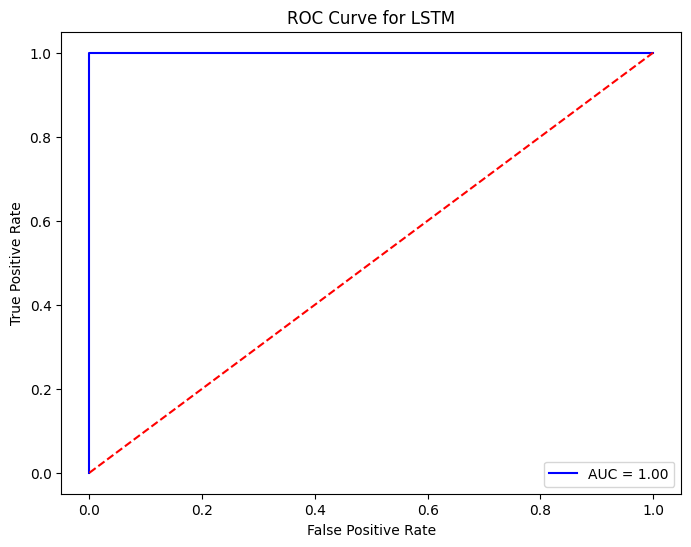


LSTM Performance:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       340
           1       1.00      1.00      1.00     10154

    accuracy                           1.00     10494
   macro avg       1.00      1.00      1.00     10494
weighted avg       1.00      1.00      1.00     10494

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1016/1016 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.9888 - loss: 0.0303 - val_accuracy: 1.0000 - val_loss: 1.0540e-05
Epoch 2/5
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 1.0000 - loss: 1.0884e-04 - val_accuracy: 1.0000 - val_loss: 2.8170e-06
Epoch 3/5
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 1.0000 - loss: 3.8147e-05 - val_accuracy: 1.0000 - val_loss: 1.0474e-06
Epoch 4/5
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 1.0000 - loss: 1.6503e-05 - val_accuracy: 1.0000 - val_loss: 4.9467e-07
Epoch 5/5
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 1.0000 - loss: 1.2452e-05 - val_accuracy: 1.0000 - val_loss: 2.5883e-07


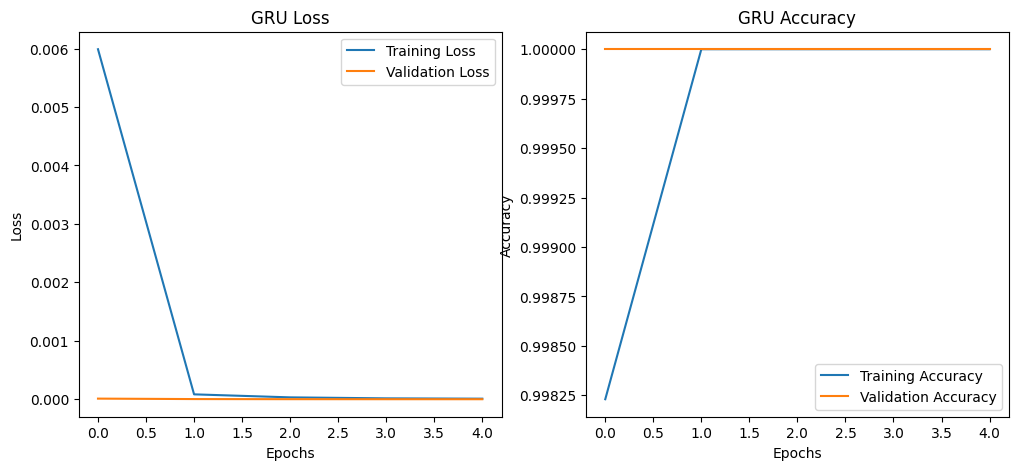

328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


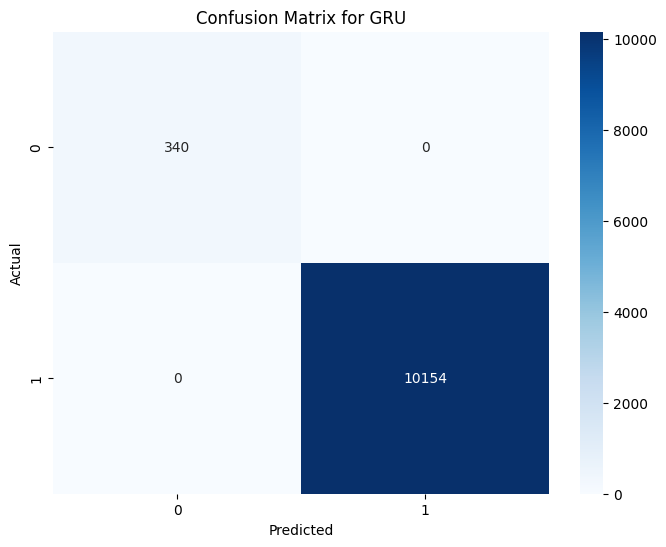

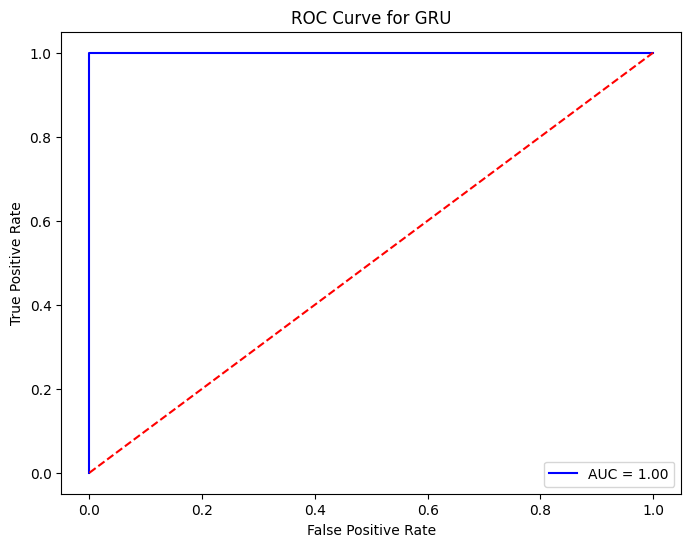


GRU Performance:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       340
           1       1.00      1.00      1.00     10154

    accuracy                           1.00     10494
   macro avg       1.00      1.00      1.00     10494
weighted avg       1.00      1.00      1.00     10494



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, LSTM, GRU, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Adds more dropout and batch normalization layers, applies stricter early stopping during training.
# Gaussian Noise Addition
def add_gaussian_noise(data, mean=0, std=0.01):
    noise = np.random.normal(mean, std, data.shape)
    return data + noise

# Data Preprocessing Function
def preprocess_data(X, y):
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)

    selector = SelectKBest(score_func=f_classif, k=5)
    X_selected = selector.fit_transform(X_imputed, y)

    return X_selected, y

# Placeholder for your data: Replace X, y with your dataset
# Example: X, y = pd.read_csv('data.csv').drop('target', axis=1), pd.read_csv('data.csv')['target']

# Data Preprocessing
X, y = preprocess_data(X, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Gaussian Noise Addition
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_noisy = add_gaussian_noise(X_train_scaled)

# SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_noisy, y_train)

# Label encoding for the target variable
y_encoded = LabelEncoder().fit_transform(y_train_balanced)
y_categorical = to_categorical(y_encoded)

# Define function to build RNN model
def build_rnn(input_shape):
    model = Sequential([
        SimpleRNN(64, activation='tanh', input_shape=input_shape, return_sequences=True),
        BatchNormalization(),
        Dropout(0.4),
        SimpleRNN(32, activation='tanh'),
        Dropout(0.4),
        Dense(y_categorical.shape[1], activation='softmax')
    ])
    return model

# Define function to build LSTM model
def build_lstm(input_shape):
    model = Sequential([
        LSTM(64, activation='tanh', input_shape=input_shape, return_sequences=True),
        BatchNormalization(),
        Dropout(0.4),
        LSTM(32, activation='tanh'),
        Dropout(0.4),
        Dense(y_categorical.shape[1], activation='softmax')
    ])
    return model

# Define function to build GRU model
def build_gru(input_shape):
    model = Sequential([
        GRU(64, activation='tanh', input_shape=input_shape, return_sequences=True),
        BatchNormalization(),
        Dropout(0.4),
        GRU(32, activation='tanh'),
        Dropout(0.4),
        Dense(y_categorical.shape[1], activation='softmax')
    ])
    return model

# Compile, train, and evaluate models
def evaluate_neural_model(build_fn, model_name):
    input_shape = (X_train_balanced.shape[1], 1)
    X_train_reshaped = X_train_balanced.reshape(-1, X_train_balanced.shape[1], 1)
    X_test_reshaped = X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1)

    model = build_fn(input_shape)
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(
        X_train_reshaped, y_categorical,
        validation_split=0.2,
        epochs=5,
        batch_size=64,
        verbose=1,
        callbacks=[early_stopping]
    )

    # Plot loss and accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Evaluate model
    y_pred_probs = model.predict(X_test_reshaped)
    y_pred = y_pred_probs.argmax(axis=1)
     # Convert y_test to categorical format (one-hot encoding)
    y_test_categorical = to_categorical(y_test) # Change here
    y_test_labels = y_test_categorical.argmax(axis=1) # Change here


    # Confusion Matrix
    cm = confusion_matrix(y_test_labels, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test_labels, y_pred_probs[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.title(f'ROC Curve for {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

    # Metrics
    print(f"\n{model_name} Performance:")
    print("Classification Report:\n", classification_report(y_test_labels, y_pred))

# Evaluate RNN
evaluate_neural_model(build_rnn, "RNN")

# Evaluate LSTM
evaluate_neural_model(build_lstm, "LSTM")

# Evaluate GRU
evaluate_neural_model(build_gru, "GRU")


Epoch 1/10
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 45s 20ms/step - accuracy: 0.9877 - loss: 8.8161 - val_accuracy: 1.0000 - val_loss: 0.3943
Epoch 2/10
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.9987 - loss: 0.2300 - val_accuracy: 1.0000 - val_loss: 0.1603
Epoch 3/10
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.9993 - loss: 0.1226 - val_accuracy: 1.0000 - val_loss: 0.1010
Epoch 4/10
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.9992 - loss: 0.0987 - val_accuracy: 1.0000 - val_loss: 0.0870
Epoch 5/10
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9995 - loss: 0.0832 - val_accuracy: 1.0000 - val_loss: 0.0651
Epoch 6/10
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.9996 - loss: 0.0705 - val_accuracy: 1.0000 - val_loss: 0.0671
Epoch 7/10
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9996 - loss: 0.0629 - val_accuracy: 1.0000 - val_loss: 0.0485
Epoch 8/10
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.9996 -

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


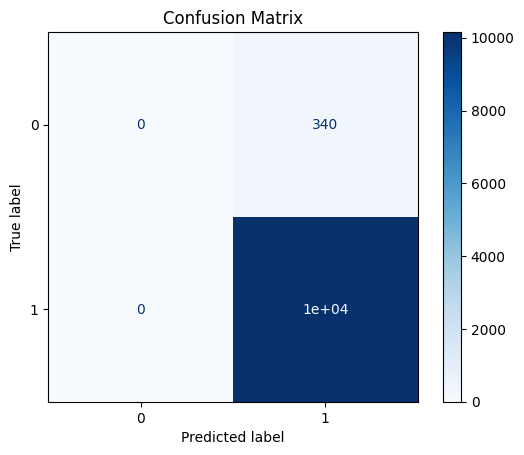

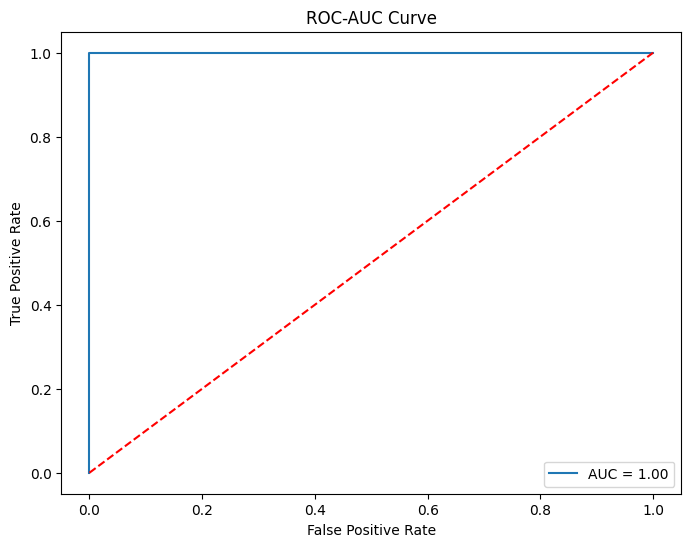

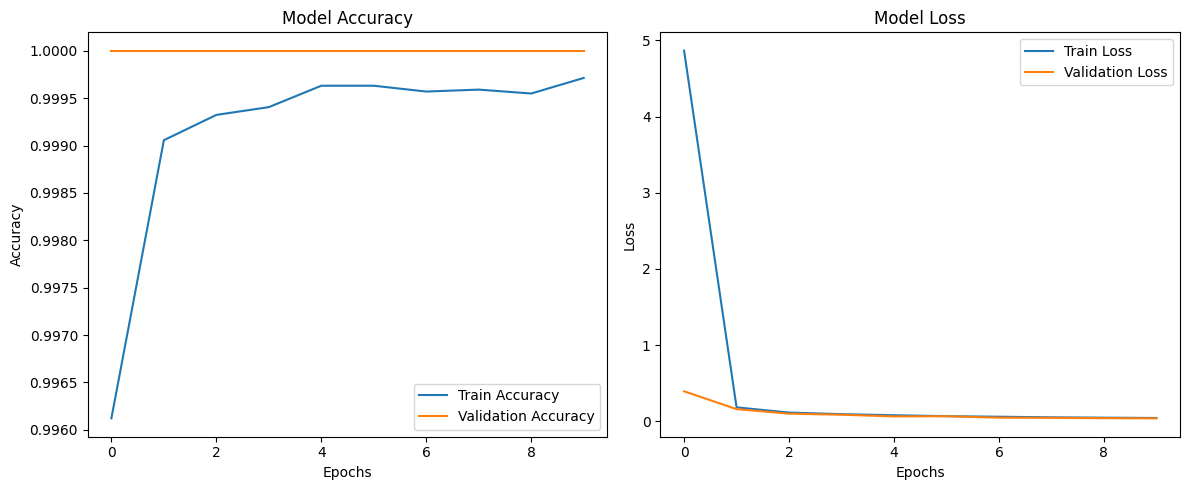

In [ ]:
# ENSEMBLE MODEL WITH OVERFITTING PREVENTION
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Dense, Dropout, Conv1D, MaxPooling1D, Flatten, LSTM, Bidirectional, GRU,
    concatenate, BatchNormalization
)
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1_l2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Gaussian Noise Addition
def add_gaussian_noise(data, mean=0, std=0.01):
    noise = np.random.normal(mean, std, data.shape)
    return data + noise

# Data Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)
X_train_noisy = add_gaussian_noise(X_train_scaled)

# Reshape data for CNN and RNN models
input_shape = (X_train_scaled.shape[1], 1)
X_train_reshaped = X_train_noisy.reshape(-1, X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1)

# CNN Model
def create_cnn(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv1D(32, kernel_size=3, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01))(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Flatten()(x)
    return inputs, x

# LSTM Model
def create_lstm(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(64, return_sequences=False, kernel_regularizer=l1_l2(l1=0.01, l2=0.01))(inputs)
    x = BatchNormalization()(x)
    return inputs, x

# BiLSTM Model
def create_bilstm(input_shape):
    inputs = Input(shape=input_shape)
    x = Bidirectional(LSTM(64, return_sequences=False, kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))(inputs)
    x = BatchNormalization()(x)
    return inputs, x

# GRU Model
def create_gru(input_shape):
    inputs = Input(shape=input_shape)
    x = GRU(64, return_sequences=False, kernel_regularizer=l1_l2(l1=0.01, l2=0.01))(inputs)
    x = BatchNormalization()(x)
    return inputs, x

# Ensemble Model
cnn_input, cnn_output = create_cnn(input_shape)
lstm_input, lstm_output = create_lstm(input_shape)
bilstm_input, bilstm_output = create_bilstm(input_shape)
gru_input, gru_output = create_gru(input_shape)

merged = concatenate([cnn_output, lstm_output, bilstm_output, gru_output])
x = Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01))(merged)
x = Dropout(0.6)(x)  # Increased dropout
outputs = Dense(1, activation='sigmoid')(x)

ensemble_model = Model(inputs=[cnn_input, lstm_input, bilstm_input, gru_input], outputs=outputs)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
ensemble_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Model Training
history = ensemble_model.fit(
    [X_train_reshaped, X_train_reshaped, X_train_reshaped, X_train_reshaped],
    y_train_balanced,
    epochs=10,
    batch_size=32,
    validation_split=0.4,
    callbacks=[early_stopping],
    verbose=1
)

# Model Evaluation
y_pred = (ensemble_model.predict([X_test_reshaped] * 4) > 0.5).astype(int)
y_prob = ensemble_model.predict([X_test_reshaped] * 4)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_prob):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.title('ROC-AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Plot Training History
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)
